# Tarea Semana 6

Para esta semana ustedes van a buscar un dataset al que le puedan aplicar el algoritmo Naive Bayes.

1. Explque brevemente el dataset. Muestre los datos mediante algún gráfico de dispersión o distribuciones(2 pts)
2. Ajuste un modelo de Naive Bayes (2 pts)
3. Muestre el accuracy del modelo ajustado (1 pt)
4. Muestre la matriz de confusión del modelo ajustado (2 pt)
5. Grafique los datos originales y el contorno de predicción del modelo usando LDA (para reducir las dimensiones) (3 pts)

\[Extra 5 pts\]: Grafique las distribuciones normales de cada clase

![bayes](bayes.png)

Busque un dataset que sea de su agrado, puede buscarlos en cualquier fuente, sin embargo les recomiendo comenzar a buscar en:
* [Kaggle](https://www.kaggle.com/datasets)
* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [US Government Open data](https://www.data.gov/)
    
¡La idea es que utilicen el que ustedes quieran! Sin emabargo, el requisito es que hagan sus predicciones con Naive Bayes

## Video de la Semana

[Gaussian Naive Bayes, Clearly Explained!!!](https://www.youtube.com/watch?v=H3EjCKtlVog)

[How Well Can an AI Learn Physics?](https://www.youtube.com/watch?v=2Bw5f4vYL98)



## Lectura Recomendada

> Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".

# Imports

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

np.set_printoptions(precision=4)

In [91]:
df = pd.read_csv("data\\loanpaymentsdata.csv")

In [92]:
prep_df=df.drop(['Loan_ID','terms'],axis=1).copy()

In [93]:
prep_df

,loan_status,Principal,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,PAIDOFF,1000,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,PAIDOFF,1000,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,PAIDOFF,1000,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,PAIDOFF,1000,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [94]:
prep_df.dtypes

loan_status        object
Principal           int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [95]:
def date_util(date):
	dat=date.date()
	return dat

In [96]:
prep_df["eff_date"] =prep_df["effective_date"].apply(pd.to_datetime)
prep_df["d_date"] =prep_df["due_date"].apply(pd.to_datetime)
prep_df["paid_date"] =prep_df["paid_off_time"].apply(pd.to_datetime)

In [97]:
#prep_df["eff_date"]=prep_df.apply(lambda row: date_util(row['eff_date']), axis=1)
#prep_df["d_date"]=prep_df.apply(lambda row: date_util(row['d_date']), axis=1)
#prep_df["paid_date"]=prep_df.apply(lambda row: date_util(row['paid_date']), axis=1)

In [101]:
def datediff(paiddate,duedate):
    datediff=(paiddate-duedate)
    datediff_2=datediff/np.timedelta64(1,'D')
    if datediff_2<1:
            result=0
    if np.isnan(datediff_2)==True:
            result=-1
    else:
            result=int(round(datediff_2,0))
    return result

In [102]:
prep_df["PastDueDays"]=prep_df.apply(lambda row: datediff(row['paid_date'], row['d_date']), axis=1)
prep_df["LoanYear"]=prep_df['eff_date'].dt.year
prep_df["LoanMonth"]=prep_df['eff_date'].dt.month
prep_df.dtypes

loan_status               object
Principal                  int64
effective_date            object
due_date                  object
paid_off_time             object
past_due_days            float64
age                        int64
education                 object
Gender                    object
eff_date          datetime64[ns]
d_date            datetime64[ns]
paid_date         datetime64[ns]
PastDueDays                int64
LoanYear                   int64
LoanMonth                  int64
dtype: object

In [103]:
prep_df=prep_df.drop(['effective_date','due_date','paid_off_time','eff_date','d_date','paid_date','past_due_days'],axis=1).copy()

In [105]:
prep_df

,loan_status,Principal,age,education,Gender,PastDueDays,LoanYear,LoanMonth
0,PAIDOFF,1000,45,High School or Below,male,-22,2016,9
1,PAIDOFF,1000,50,Bechalor,female,0,2016,9
2,PAIDOFF,1000,33,Bechalor,female,-11,2016,9
3,PAIDOFF,1000,27,college,male,1,2016,9
4,PAIDOFF,1000,28,college,female,-14,2016,9
...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,28,High School or Below,male,4,2016,9
496,COLLECTION_PAIDOFF,1000,26,High School or Below,male,15,2016,9
497,COLLECTION_PAIDOFF,800,30,college,male,3,2016,9
498,COLLECTION_PAIDOFF,1000,38,college,female,2,2016,9


In [115]:
prep_df.groupby(by=['education']).count()
prep_df.groupby(by=['loan_status']).count()


,Principal,age,education,Gender,PastDueDays,LoanYear,LoanMonth,Education
loan_status,,,,,,,,
COLLECTION,100,100,100,100,100,100,100,100
COLLECTION_PAIDOFF,100,100,100,100,100,100,100,100
PAIDOFF,300,300,300,300,300,300,300,300


In [116]:
prep_df['Education'] = prep_df['education'].apply({'High School or Below':0, 'college':1,'Bechalor':2,'Master or Above':3}.get)
prep_df['Status'] = prep_df['loan_status'].apply({'COLLECTION':0, 'PAIDOFF':1,'COLLECTION_PAIDOFF':2}.get)
prep_df['Sex'] = prep_df['Gender'].apply({'male':0, 'female':1}.get)

In [120]:
prep_df["AgeGroup"] = pd.cut(prep_df["age"],3, precision=0, labels=["Young","Mid-Aged","Old"])
prep_df["PrincipalRange"] = pd.cut(prep_df["Principal"],3, precision=0, labels=["Low","Medium","High"])

In [125]:
prep_df['Status']=pd.Categorical(prep_df['Status'])

In [126]:
loan=prep_df.drop(['loan_status','Principal','age','education','Gender'],axis=1).copy()

In [129]:
loan.dtypes

PastDueDays          int64
LoanYear             int64
LoanMonth            int64
Education            int64
Status            category
Sex                  int64
AgeGroup          category
PrincipalRange    category
dtype: object

In [134]:
loan

,PastDueDays,LoanYear,LoanMonth,Education,Status,Sex,AgeGroup,PrincipalRange
0,-22,2016,9,0,1,0,Old,High
1,0,2016,9,2,1,1,Old,High
2,-11,2016,9,2,1,1,Mid-Aged,High
3,1,2016,9,1,1,0,Young,High
4,-14,2016,9,1,1,1,Young,High
...,...,...,...,...,...,...,...,...
495,4,2016,9,0,2,0,Young,High
496,15,2016,9,0,2,0,Young,High
497,3,2016,9,1,2,0,Mid-Aged,High
498,2,2016,9,1,2,1,Mid-Aged,High


In [ ]:
El dataset contiene 500 records que indican si un prestamo fue pagado o no.
Status
0 no fue pagado
1 pagado(a tiempo)
2 pagado(cobros)
Gender
0 male 1 female
Education
0 indica el nivel mas bajo de escolaridad mientras 3 el mas alto.

Alguna datos de distribucion
60% de los prestamos fueron cancelados
Mas del 80% de las personas tienen una escolaridad media o baja
el 80% son hombres
10% son personas senior,mientras el resto se divide equitativamente entre jovenes y adultos
Mas del 80% de los prestamos son rangp alto(~1000 USD).

La idea del dataset es con estas variables determinar el Status(si el prestamo sera pagado o no)




In [144]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=make_subplots(
rows=3,cols=2,
subplot_titles=['Payment Status','Education','Age','Sex','LoanPrincipalRange']
)
fig.append_trace(go.Histogram(x=loan[::1]['Status'],nbinsx=3),1,1)
fig.append_trace(go.Histogram(x=loan[::1]['Education'],nbinsx=4),1,2)
fig.append_trace(go.Histogram(x=loan[::1]['AgeGroup'],nbinsx=3),2,1)
fig.append_trace(go.Histogram(x=loan[::1]['Sex'],nbinsx=2),2,2)
fig.append_trace(go.Histogram(x=loan[::1]['PrincipalRange'],nbinsx=2),3,1)
fig.show()

In [152]:
loan.head()

,PastDueDays,LoanYear,LoanMonth,Education,Status,Sex,AgeGroup,PrincipalRange
0,-22,2016,9,0,1,0,Old,High
1,0,2016,9,2,1,1,Old,High
2,-11,2016,9,2,1,1,Mid-Aged,High
3,1,2016,9,1,1,0,Young,High
4,-14,2016,9,1,1,1,Young,High


In [153]:
loan['AgeGroup_1'] = prep_df['AgeGroup'].apply({'Old':2, 'Mid-Aged':1,'Young':0}.get)
loan['Principal'] = prep_df['PrincipalRange'].apply({'High':2, 'Medium':1,'Low':0}.get)

In [203]:
X=loan.drop(['Status','AgeGroup','PrincipalRange','LoanYear','LoanMonth'],axis=1).copy()

In [204]:
y=loan['Status']

Naive Bayes

In [161]:
nb_model = GaussianNB()
nb_model.fit(X, y)
nb_model.score(X, y)


0.774

In [162]:
nb_model.sigma_

array([[6.9274e-08, 5.1040e-01, 9.0000e-02, 3.6510e-01, 6.9274e-08],
       [2.6114e+01, 5.2249e-01, 1.4546e-01, 3.8146e-01, 1.0679e-01],
       [1.5645e+02, 4.7160e-01, 1.2040e-01, 4.2000e-01, 3.9600e-02]])

In [163]:
SIGMA = nb_model.sigma_

for i, label in enumerate(loan['Status'].unique()):
    print(label)
    for j, col in enumerate(X.columns):
        print(f"{col} variance: {SIGMA[i][j]}")
    print()

1
PastDueDays variance: 6.9274256e-08
Education variance: 0.5104000692742563
Sex variance: 0.0900000692742559
AgeGroup_1 variance: 0.36510006927425565
Principal variance: 6.9274256e-08

0
PastDueDays variance: 26.114166735940923
Education variance: 0.5224889581631438
Sex variance: 0.14545562482981217
AgeGroup_1 variance: 0.38145562482981277
Principal variance: 0.10678895816314464

2
PastDueDays variance: 156.45390006927425
Education variance: 0.4716000692742564
Sex variance: 0.120400069274256
AgeGroup_1 variance: 0.42000006927425565
Principal variance: 0.03960006927425597



In [164]:
THETA = nb_model.theta_

for i, label in enumerate(loan['Status'].unique()):
    print(label)
    for j, col in enumerate(X.columns):
        print(f"{col} mean: {THETA[i][j]}")
    print()

1
PastDueDays mean: -1.0
Education mean: 0.64
Sex mean: 0.1
AgeGroup_1 mean: 0.57
Principal mean: 2.0

0
PastDueDays mean: -2.25
Education mean: 0.7466666666666667
Sex mean: 0.17666666666666667
AgeGroup_1 mean: 0.6233333333333333
Principal mean: 1.9433333333333334

2
PastDueDays mean: 9.81
Education mean: 0.78
Sex mean: 0.14
AgeGroup_1 mean: 0.6
Principal mean: 1.98



In [177]:
from math import sqrt, pi, exp

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean=0.0, stdev=1.0):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

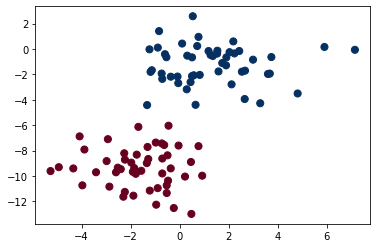

In [179]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [223]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
#y_train = y[:300]
#y_test = y[300:]

#X_train = X[:300]
#X_test = X[300:]

In [224]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

In [225]:
y_test

475    2
385    0
167    1
40     1
350    0
      ..
87     1
12     1
428    2
92     1
78     1
Name: Status, Length: 125, dtype: category
Categories (3, int64): [0, 1, 2]

In [227]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.8
[[29  0  0]
 [ 6 60  7]
 [ 0 12 11]]


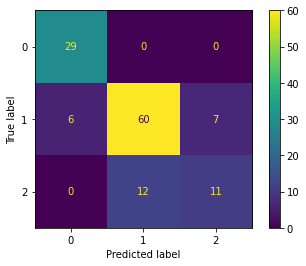

In [229]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,normalize=None)
plt.show()

Naives+LDA

In [242]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

In [244]:
nb_model = GaussianNB()
nb_model.fit(X_lda, y_train)

GaussianNB()

In [245]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [246]:
np.around(nb_model.predict(X_lda), decimals=2)

array([1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [238]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {'is_3d': True}]])

# 2d

fig.add_trace(go.Contour(
    x=X_lda[:,0],
    y=X_lda[:,1],
    z=nb_model.predict(X_lda),
    showscale=False,
    opacity=0.40,
    colorscale='portland'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_lda[:,0],
    y=X_lda[:,1],
    text=loan['Status'],
    mode='markers',
    marker_symbol=nb_model.predict(X_lda),
    marker=dict(color=y, colorscale='portland')
), row=1, col=1)

# 3d

pred_probs = np.around(nb_model.predict_proba(X_lda), decimals=2)

#x0 = np.random.normal(nb_model.theta_[0][0], nb_model.sigma_[0][0], 100)
#x1 = np.random.normal(nb_model.theta_[0][1], nb_model.sigma_[0][1], 100)
                    
for i, label in enumerate(loan.Status.unique()):
        
    fig.add_trace(go.Mesh3d(
        x=X_lda[:,0], 
        y=X_lda[:,1], 
        z=pred_probs[:,i], 
        opacity=0.5,
        name=f'P({label})',
        color=i+1,
        colorscale='portland'
    ), row=1, col=2)


fig.show()

In [247]:
nb_model.score(X_lda, y_train)

0.5866666666666667

In [248]:
classifier.fit(X_lda, y_train)
y_pred  =  classifier.predict(X_lda)

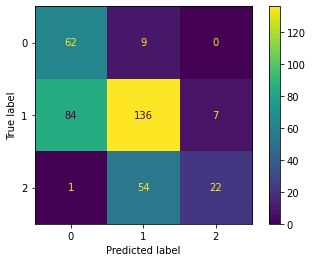

In [251]:
disp = plot_confusion_matrix(classifier, X_lda, y_train,normalize=None)
plt.show()